In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('../content/csv/FINALDATASET_EastSlopesNorth.csv')
df.set_index('Date', inplace=True)
df.head()

,Area,Above Treeline,At Treeline,Below Treeline,Yesterday Danger Above Treeline,Yesterday Danger At Treeline,Yesterday Danger Below Treeline,Max Air Temp 24hr,Total Snowfall 24hr,Delta SWE 24hr,Min Temp Diff 48hr,Max Windspeed 24hr,Was High Winds 24hr,Max Air Temp 72hr,Total Snowfall 72hr,Weighted Snowfall 96hr,Was Heavy Snowfall 24hr,Sum Max Temp 72hr
Date,,,,,,,,,,,,,,,,,,
2022-11-25,East Slopes North,2,1,1,0,0,0,42.000000,-0.666667,0.066667,-1.566667,0.000,0,0.000000,0.000000,0.000000,0,0.000000
2022-11-26,East Slopes North,3,3,2,2,1,1,30.733333,-0.666667,0.100000,-0.200000,5.085,0,0.000000,0.000000,0.000000,0,0.000000
2022-11-27,East Slopes North,2,2,1,3,3,2,30.533333,0.333333,0.233333,-6.400000,5.546,0,42.000000,-1.000000,0.000000,0,103.266667
2022-11-28,East Slopes North,2,1,1,2,2,1,20.766667,6.333333,0.500000,-15.500000,4.077,0,30.733333,6.000000,6.083333,0,82.033333
2022-11-29,East Slopes North,3,3,2,2,1,1,11.466667,0.000000,-0.100000,-0.266667,6.379,0,30.533333,6.666667,4.750000,0,62.766667


In [3]:
df.drop('Area', axis=1, inplace=True)

df.drop(['Yesterday Danger Above Treeline', 'Yesterday Danger At Treeline', 'Yesterday Danger Below Treeline'], inplace=True, axis=1)

df.drop(['Above Treeline', 'Below Treeline'], inplace=True, axis=1)

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df.drop('At Treeline', axis=1))

scaled = scaler.transform(df.drop('At Treeline', axis=1))

scaled_df = pd.DataFrame(scaled, columns=df.drop('At Treeline', axis=1).columns)


scaled_df.drop(['Was High Winds 24hr', 'Was Heavy Snowfall 24hr'], axis=1, inplace=True)

# normalized_df=(df-df.mean())/df.std()
normalized_df = df
for col in normalized_df.columns:
    if col not in (
        'At Treeline', 
        'Yesterday Danger Above Treeline', 
        'Yesterday Danger At Treeline', 
        'Yesterday Danger Below Treeline'):
        normalized_df[col] = (df[col]-df[col].mean())/df[col].std()
# normalized_df=(df-df.min())/(df.max()-df.min())

normalized_df.drop(['Was High Winds 24hr', 'Was Heavy Snowfall 24hr'], axis=1, inplace=True)

In [5]:
scaled_df.head()

,Max Air Temp 24hr,Total Snowfall 24hr,Delta SWE 24hr,Min Temp Diff 48hr,Max Windspeed 24hr,Max Air Temp 72hr,Total Snowfall 72hr,Weighted Snowfall 96hr,Sum Max Temp 72hr
0,1.631423,-0.453065,-0.479731,-0.313192,-1.701396,-4.976827,-0.329517,-0.347646,-4.176217
1,0.069664,-0.453065,-0.386268,-0.041719,0.175406,-4.976827,-0.329517,-0.347646,-4.176217
2,0.041941,-0.047293,-0.012418,-1.273279,0.345555,1.358704,-0.570339,-0.347646,0.666313
3,-1.311892,2.387342,0.735282,-3.080892,-0.196632,-0.340828,1.115417,1.506762,-0.329391
4,-2.601036,-0.182550,-0.947043,-0.054961,0.653003,-0.370997,1.275965,1.100316,-1.232872


In [6]:
normalized_df.iloc[40:45]

,At Treeline,Max Air Temp 24hr,Total Snowfall 24hr,Delta SWE 24hr,Min Temp Diff 48hr,Max Windspeed 24hr,Max Air Temp 72hr,Total Snowfall 72hr,Weighted Snowfall 96hr,Sum Max Temp 72hr
Date,,,,,,,,,,
2023-01-04,2,-0.598218,-0.586262,-0.664321,0.195959,-1.695436,-1.066169,-1.448263,-1.308355,-0.801760
2023-01-05,2,-0.252888,-0.451478,-0.012375,1.489187,-1.695436,-0.690375,-1.048299,-1.156472,-0.512039
2023-01-06,1,0.272014,-0.181911,-0.012375,0.195959,-1.695436,-0.119168,-0.728327,-0.751450,-0.119513
2023-01-07,2,-0.077921,-0.047127,-0.105510,0.136576,-1.324701,-0.119168,-0.408355,-0.422370,0.056500
2023-01-08,2,-0.004250,0.761575,0.546436,-0.028376,-0.582862,-0.119168,0.311581,0.387674,0.140612


In [7]:
normalized_df['At Treeline'].value_counts()

2    79
1    37
3    25
4     2
Name: At Treeline, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

# x = normalized_df.drop('Below Treeline', axis=1)
x = normalized_df # scaled_df
y = df['At Treeline']

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

# 3 is best BUT results in underprediction in extreme cases
# 10 results in no WAY OFF predictions
model = KNeighborsClassifier(n_neighbors=4) 

model.fit(x_training_data, y_training_data)

predictions = model.predict(x_test_data)
predictions

array([1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 2, 1, 2, 2])

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           1       0.91      1.00      0.95        10
           2       0.78      0.93      0.85        15
           3       0.00      0.00      0.00         4

    accuracy                           0.83        29
   macro avg       0.56      0.64      0.60        29
weighted avg       0.72      0.83      0.77        29



/home/alyo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alyo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alyo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


https://www.statology.org/sklearn-classification-report/

In [11]:
print(confusion_matrix(y_test_data, predictions))

[[10  0  0]
 [ 1 14  0]
 [ 0  4  0]]


https://www.geeksforgeeks.org/confusion-matrix-machine-learning/#

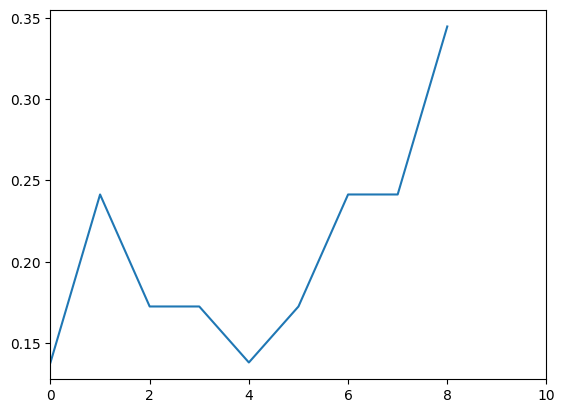

In [12]:
error_rates = []

xmax = 10
for i in np.arange(1, xmax): # 101

    new_model = KNeighborsClassifier(n_neighbors = i)

    new_model.fit(x_training_data, y_training_data)

    new_predictions = new_model.predict(x_test_data)

    error_rates.append(np.mean(new_predictions != y_test_data))

plt.xlim(0, xmax)
plt.plot(error_rates)

Try a prediction!

In [13]:
date_list = ['2022-12-01', '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01']

months = ['2022-12', '2023-01', '2023-02', '2023-03']
days = ['-10', '-20']

date_list = []
for month in months:
    for day in days:
        date_list.append(month + day)

for date in date_list:
    data = normalized_df.loc[date]
    predX = pd.DataFrame([data], columns=normalized_df.columns)
    predicted = model.predict(predX)[0]
    actual = data['At Treeline']
    print(date)
    print('\tpredicted:', predicted, 'actual:', actual, 'correct:', predicted == actual)


2022-12-10
	predicted: 2 actual: 3.0 correct: False
2022-12-20
	predicted: 2 actual: 3.0 correct: False
2023-01-10
	predicted: 2 actual: 2.0 correct: True
2023-01-20
	predicted: 2 actual: 2.0 correct: True
2023-02-10
	predicted: 2 actual: 2.0 correct: True
2023-02-20
	predicted: 3 actual: 3.0 correct: True
2023-03-10
	predicted: 2 actual: 2.0 correct: True
2023-03-20
	predicted: 1 actual: 1.0 correct: True


In [14]:
predicted = model.predict(normalized_df)
actual = normalized_df['At Treeline']
assert len(predicted) == len(actual)
over_predict = 0
under_predict = 0
way_off = 0
for i in range(len(actual)):
    p = predicted[i]
    a = actual[i]
    diff = a - p
    if diff == 1:
        under_predict += 1
    if diff == -1:
        over_predict += 1
    if diff < -1 or diff > 1:
        way_off += 1
        print('WAY off: predicted:', p, 'actual:', a)
under_pct = '{0:.2f}'.format(under_predict * 100.0 / len(actual))
over_pct = '{0:.2f}'.format(over_predict * 100.0 / len(actual))
way_pct = '{0:.2f}'.format(way_off * 100.0 / len(actual))
print('Predicted less dangerous than actual:', under_predict, f'{under_pct}%')
print('Predicted more dangerous than actual:', over_predict, f'{over_pct}%')
print('WAY off:', way_off, f'{way_pct}%')

WAY off: predicted: 1 actual: 3
WAY off: predicted: 2 actual: 4
Predicted less dangerous than actual: 22 15.38%
Predicted more dangerous than actual: 3 2.10%
WAY off: 2 1.40%


In [15]:
mid_jan = normalized_df.loc['2023-01-15'].copy()
# Change some values just slightly
mid_jan.at['Delta SWE 24hr'] = -0.11
mid_jan.at['Total Snowfall 72hr'] = 0.8
mid_jan.at['Max Air Temp 24hr'] = 0.5

predX = pd.DataFrame([mid_jan], columns=normalized_df.columns)
predicted = model.predict(predX)[0]
actual = mid_jan['At Treeline']
print(predicted, actual)


mid_feb = normalized_df.loc['2023-02-15'].copy()
# Change some values just slightly
mid_feb.at['Min Temp Diff 48hr'] = -0.25
mid_feb.at['Sum Max Temp 72hr'] = 0.06
mid_feb.at['Max Windspeed 24hr'] = 0.7

predX = pd.DataFrame([mid_feb], columns=normalized_df.columns)
predicted = model.predict(predX)[0]
actual = mid_feb['At Treeline']
print(predicted, actual)

2 2.0
1 1.0
